In [1]:
#import libraries and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')

#print('2015 header = ', df_2015.head(2))
#print('2016 header = ', df_2016.head(2))

In [68]:
#see if there's a difference between happiness between 2015 and 2016
mean_2015 = np.mean(df_2015['Happiness Score'])
mean_2016 = np.mean(df_2016['Happiness Score'])
obs_mean_diff = mean_2015 - mean_2016
print(obs_mean_diff)

#defining functions
#ecdf
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x,y

def perm_samples(data1, data2):
    con_data = np.concatenate((data1, data2))
    perm_data = np.random.permutation(con_data)
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def bs_pairs(x, y):
    inds = np.arange(len(x))
    bs_inds = np.random.choice(inds, size = len(inds))
    bs_x, bs_y = x[bs_inds], y[bs_inds]
    return bs_x, bs_y


-0.0064505361606048695


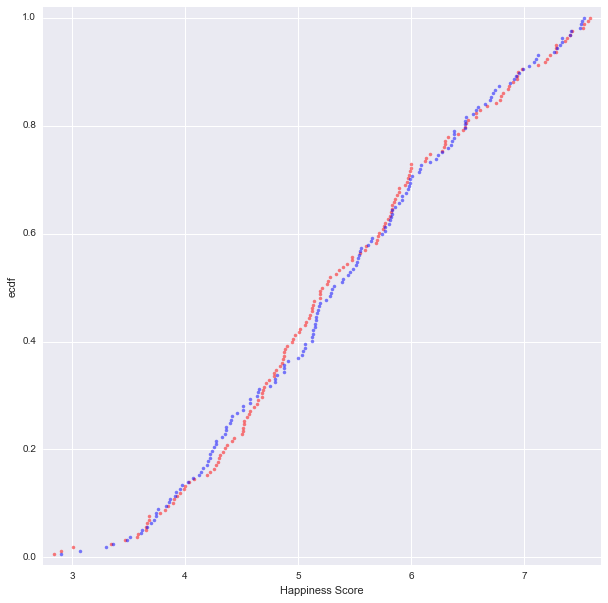

In [3]:
#seeing how the year 2015 and 2016 compared to eacher
x_2015, y_2015 = ecdf(df_2015['Happiness Score'])
x_2016, y_2016 = ecdf(df_2016['Happiness Score'])
plt.figure(figsize=(10,10))
_ = plt.plot(x_2015, y_2015, marker = '.', linestyle = 'none', color = 'red', alpha = 0.5)
_ = plt.plot(x_2016, y_2016, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.5)
_ = plt.xlabel('Happiness Score')
_ = plt.ylabel('ecdf')
_ = plt.margins(0.02)

plt.show()


p-values =  0.4749


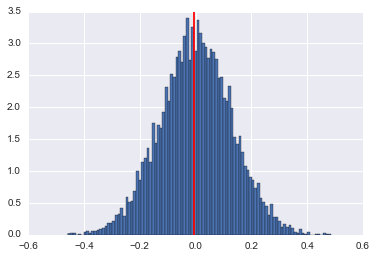

In [4]:
#checking to see if there's a differenc just based on the year, which it seems there isn't
perm_avgs = np.empty(10000)
for x in range(10000):
    perm_2015, perm_2016 = perm_samples(df_2015['Happiness Score'], df_2016['Happiness Score'])
    perm_avgs[x] = np.mean(perm_2015) - np.mean(perm_2016)
    
p = np.sum(perm_avgs <= obs_mean_diff)/len(perm_avgs)
print('p-values = ', p)
p_hist = plt.hist(perm_avgs, bins = 100, normed = True)
p_hist = plt.axvline(obs_mean_diff, color  ='red')
plt.show()


In [40]:
#since there seems to be no significant differnce of the happiness score distribution 
#between the years, we'll combine the data

df_combined = pd.concat([df_2015, df_2016], axis = 0)

print(len(df_2015), len(df_2016),len(df_combined))



158 157 315


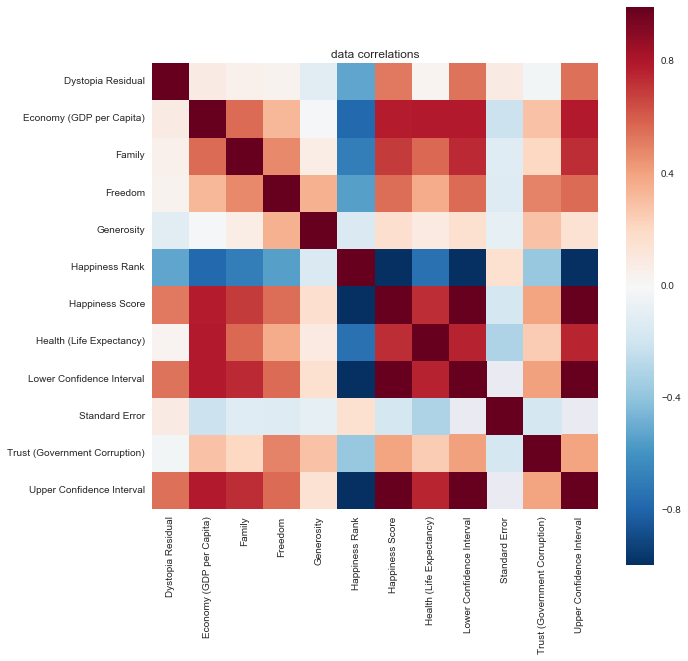

In [7]:
#correlation matrix
datacorr = df_combined.corr()
plt.figure(figsize = (10, 10))
plt.title('data correlations')
sns.heatmap(datacorr, vmax = 0.8, square = True)

y = 2.1652680708 x + 3.43055981588


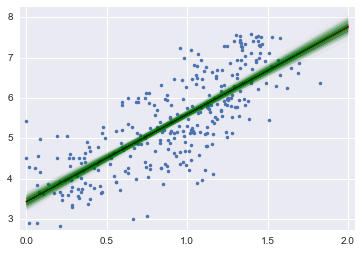

In [80]:
#Economy (GDP per Capita) seems to have the strongest correlation to happiness score
m, b = np.polyfit(df_combined['Economy (GDP per Capita)'], df_combined['Happiness Score'], 1)
print('y =',m,'x +',b)
#sns.lmplot(x = df_combined['Economy (GDP per Capita)'], y = df_combined['Happiness Score'], data = df_combined )
x = np.array([0, 2])
y = []
for i in x:
    y.append(m*i+b)
    
_ = plt.plot(df_combined['Economy (GDP per Capita)'], df_combined['Happiness Score'], marker = '.', linestyle = 'none')
_ = plt.plot(x, y, color = 'red')

for n in range(1000):
    df_bs_x, df_bs_y = bs_pairs(np.array(df_combined['Economy (GDP per Capita)']),\
                                np.array(df_combined['Happiness Score']))

    #_ = plt.plot(df_bs_x, df_bs_y, marker = '.', linestyle = 'none', color = 'green')
    a, c = np.polyfit(df_bs_x, df_bs_y, 1)
    _ = plt.plot(x, a*x+c, color = 'green', alpha = 0.1, linewidth = 0.1)
plt.margins(0.02)
plt.show()

In [87]:
i = np.array(df_combined['Economy (GDP per Capita)'])
o = np.array(df_combined['Happiness Score'])
r = np.corrcoef(i,o)
r_prime = r[0,1]
print(r_prime)
r_bs = []
for x in range(100):
    r_x, r_y = bs_pairs(i, o)
    bs_coef = np.corrcoef(r_x, r_y)
    r_bs.append(bs_coef[0,1])
    
print(np.percentile(r_bs, (2.5, 97.5)))

0.779171095113
[ 0.7448944   0.80248535]
